# Project Part 4


## Data
The data that I am using include some information on my fitness stats, as well as another file that has my headphone sound levels and my time asleep

The main problem is that my time asleep data actually is nothing but NaN. So that will be a focus on the data cleaning as I just abandon that data.

Because of that, for this assignment I will **NOT** be using both of my datasets, instead focusing on the apple fitness data.

# Fitness Data


### Load in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fitness_data_df = pd.read_csv("puryear_apple_data.csv", index_col=0)

### Original Attempt at graphing
My first way of approaching this included using a date / time library to format and my graph, because when I first printed it with my formatting, it would display many dates as 1/1/1970, as a default value.

My original code included an excerpt from [this program-talk website.](https://programtalk.com/python-examples/matplotlib.dates.AutoDateFormatter/)

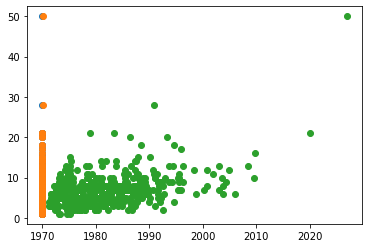

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, DateFormatter, MinuteLocator


def set_date_ticks(axis, auto=True):
    axis.axis_date()
    if auto:
        timeLocator = AutoDateLocator()
        timeFormatter = AutoDateFormatter(timeLocator)
        timeFormatter.scaled[1. / (24. * 60.)] = '%H:%M:%S'
        timeFormatter.scaled[1. / (24. * 60. * 1000.)] = '%H:%M:%S.%f'
    else:
        timeFormatter = DateFormatter("%H:%M:%S")
        timeLocator = MinuteLocator()
 
    axis.set_major_locator(timeLocator)
    axis.set_major_formatter(timeFormatter)

plt.figure()
plt.plot_date(fitness_data_df, fitness_data_df["Flights climbed(count)"])
plt.show()

Notice how there is an abundance at January 1st 1970.

### Solution
However, eventually I figured out a much more elegent solution using built in pandas functions. I used [This site to find the documentation.](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.plot.html)

Final Result:

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

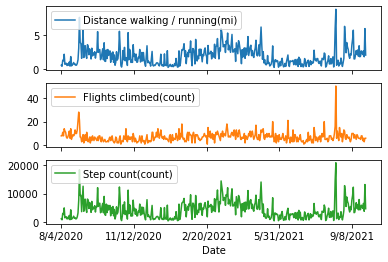

In [3]:
fitness_data_df.plot(subplots=True)

### Headphone
Due to the date being formated like "start - end section" it is difficult to use any of pandas or *dates* imported functions.  
I failed to find a way to keep the sections while formatting.

In [4]:
sound_data_df = pd.read_csv("puryear_headphones_sleep.csv")

sound_data_df.info()

#sound_data_df["Date"] = pd.to_datetime(sound_data_df["Date"])

#plt.plot_date(sound_data_df['Date'],sound_data_df["Headphone sound levels(dBASPL)"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13679 entries, 0 to 13678
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            13679 non-null  object 
 1   Headphone sound levels(dBASPL)  13679 non-null  float64
 2   Time asleep(hr)                 0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 320.7+ KB
